# 10 Minutes to pandas
导入包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation
创建Series

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

创建DataFrame,传递一个numpy数组array，带有一个datetime索引和标记的列

In [7]:
dates = pd.date_range('20170101',periods=6)
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))#6行4列
df

,A,B,C,D
2017-01-01,-0.177132,0.940313,-1.209514,-0.296927
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821
2017-01-03,-0.253875,0.476428,-0.781426,1.491265
2017-01-04,1.297528,-0.445289,-0.130484,0.642892
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188


创建DataFrame,传递一个dict

In [11]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20170102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   "F":'foo'})
df2

,A,B,C,D,E,F
0,1.0,2017-01-02,1.0,3,test,foo
1,1.0,2017-01-02,1.0,3,train,foo
2,1.0,2017-01-02,1.0,3,test,foo
3,1.0,2017-01-02,1.0,3,train,foo


In [12]:
pd.Series(1,index=list(range(4)),dtype='float32')

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32

有特定的dtypes

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
#df2.<TAB> #Ipython自动补全

## Viewing Data

In [17]:
df.head()

,A,B,C,D
2017-01-01,-0.177132,0.940313,-1.209514,-0.296927
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821
2017-01-03,-0.253875,0.476428,-0.781426,1.491265
2017-01-04,1.297528,-0.445289,-0.130484,0.642892
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939


In [18]:
df.tail(3)

,A,B,C,D
2017-01-04,1.297528,-0.445289,-0.130484,0.642892
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188


In [19]:
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [21]:
df.values

array([[-0.17713158,  0.94031294, -1.20951354, -0.29692653],
       [-1.17201194, -0.61035664, -0.42875152,  0.10682089],
       [-0.25387499,  0.47642751, -0.78142638,  1.49126546],
       [ 1.29752783, -0.44528943, -0.13048423,  0.64289185],
       [-0.14265205, -0.76930799, -1.59463128,  0.668939  ],
       [ 0.32717246, -0.39259649, -0.1299843 , -1.70818831]])

In [24]:
df.describe()#快速统计数据摘要

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.020162,-0.133468,-0.712465,0.150800
std,0.809688,0.681333,0.598082,1.092310
min,-1.172012,-0.769308,-1.594631,-1.708188
25%,-0.234689,-0.569090,-1.102492,-0.195990
50%,-0.159892,-0.418943,-0.605089,0.374856
75%,0.209716,0.259172,-0.205051,0.662427
max,1.297528,0.940313,-0.129984,1.491265


In [25]:
df.T#行列转置

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00
A,-0.177132,-1.172012,-0.253875,1.297528,-0.142652,0.327172
B,0.940313,-0.610357,0.476428,-0.445289,-0.769308,-0.392596
C,-1.209514,-0.428752,-0.781426,-0.130484,-1.594631,-0.129984
D,-0.296927,0.106821,1.491265,0.642892,0.668939,-1.708188


In [26]:
df.sort_index(axis=1,ascending=False)#列排序

,D,C,B,A
2017-01-01,-0.296927,-1.209514,0.940313,-0.177132
2017-01-02,0.106821,-0.428752,-0.610357,-1.172012
2017-01-03,1.491265,-0.781426,0.476428,-0.253875
2017-01-04,0.642892,-0.130484,-0.445289,1.297528
2017-01-05,0.668939,-1.594631,-0.769308,-0.142652
2017-01-06,-1.708188,-0.129984,-0.392596,0.327172


In [27]:
df.sort_values(by='B')

,A,B,C,D
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821
2017-01-04,1.297528,-0.445289,-0.130484,0.642892
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188
2017-01-03,-0.253875,0.476428,-0.781426,1.491265
2017-01-01,-0.177132,0.940313,-1.209514,-0.296927


## Selection

### Getting

In [28]:
df['A']

2017-01-01   -0.177132
2017-01-02   -1.172012
2017-01-03   -0.253875
2017-01-04    1.297528
2017-01-05   -0.142652
2017-01-06    0.327172
Freq: D, Name: A, dtype: float64

In [29]:
df[0:3]

,A,B,C,D
2017-01-01,-0.177132,0.940313,-1.209514,-0.296927
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821
2017-01-03,-0.253875,0.476428,-0.781426,1.491265


In [31]:
df['20170102':'20170104']

,A,B,C,D
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821
2017-01-03,-0.253875,0.476428,-0.781426,1.491265
2017-01-04,1.297528,-0.445289,-0.130484,0.642892


### Selection by Label

In [32]:
df.loc[dates[0]]

A   -0.177132
B    0.940313
C   -1.209514
D   -0.296927
Name: 2017-01-01 00:00:00, dtype: float64

In [33]:
df.loc[:,['A','B']]

,A,B
2017-01-01,-0.177132,0.940313
2017-01-02,-1.172012,-0.610357
2017-01-03,-0.253875,0.476428
2017-01-04,1.297528,-0.445289
2017-01-05,-0.142652,-0.769308
2017-01-06,0.327172,-0.392596


In [35]:
df.loc[dates[0],'A']

-0.17713158044228586

### Selection by Position

In [41]:
df.iloc[3]#第4行

A    1.297528
B   -0.445289
C   -0.130484
D    0.642892
Name: 2017-01-04 00:00:00, dtype: float64

In [42]:
df.iloc[3:5,0:2]#3-4行，1-2列

,A,B
2017-01-04,1.297528,-0.445289
2017-01-05,-0.142652,-0.769308


In [43]:
df.iloc[[1,2,4],[0,2]]#2、3、5行，1、2列

,A,C
2017-01-02,-1.172012,-0.428752
2017-01-03,-0.253875,-0.781426
2017-01-05,-0.142652,-1.594631


In [44]:
df.iloc[1:3,:]#2-3行

,A,B,C,D
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821
2017-01-03,-0.253875,0.476428,-0.781426,1.491265


In [45]:
df.iloc[:,1:3]#2-3列

,B,C
2017-01-01,0.940313,-1.209514
2017-01-02,-0.610357,-0.428752
2017-01-03,0.476428,-0.781426
2017-01-04,-0.445289,-0.130484
2017-01-05,-0.769308,-1.594631
2017-01-06,-0.392596,-0.129984


In [46]:
df.iloc[1,1]

-0.61035663556308439

### Boolean Indexing

In [47]:
df[df.A > 0]

,A,B,C,D
2017-01-04,1.297528,-0.445289,-0.130484,0.642892
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188


In [48]:
df[df > 0]

,A,B,C,D
2017-01-01,NaN,0.940313,NaN,NaN
2017-01-02,NaN,NaN,NaN,0.106821
2017-01-03,NaN,0.476428,NaN,1.491265
2017-01-04,1.297528,NaN,NaN,0.642892
2017-01-05,NaN,NaN,NaN,0.668939
2017-01-06,0.327172,NaN,NaN,NaN


In [50]:
df2 = df.copy()

df2['E']=['one','one','two','three','four','three']

df2

,A,B,C,D,E
2017-01-01,-0.177132,0.940313,-1.209514,-0.296927,one
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821,one
2017-01-03,-0.253875,0.476428,-0.781426,1.491265,two
2017-01-04,1.297528,-0.445289,-0.130484,0.642892,three
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939,four
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188,three


In [51]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2017-01-03,-0.253875,0.476428,-0.781426,1.491265,two
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939,four


### Setting

In [52]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20170102',periods=6))
s1

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64

In [53]:
df['F'] = s1

In [54]:
df

,A,B,C,D,F
2017-01-01,-0.177132,0.940313,-1.209514,-0.296927,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821,1.0
2017-01-03,-0.253875,0.476428,-0.781426,1.491265,2.0
2017-01-04,1.297528,-0.445289,-0.130484,0.642892,3.0
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939,4.0
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188,5.0


In [55]:
df.at[dates[0],'A'] = 0

In [56]:
df

,A,B,C,D,F
2017-01-01,0.000000,0.940313,-1.209514,-0.296927,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821,1.0
2017-01-03,-0.253875,0.476428,-0.781426,1.491265,2.0
2017-01-04,1.297528,-0.445289,-0.130484,0.642892,3.0
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939,4.0
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188,5.0


In [57]:
df.iat[0,1] = 0

In [58]:
df

,A,B,C,D,F
2017-01-01,0.000000,0.000000,-1.209514,-0.296927,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,0.106821,1.0
2017-01-03,-0.253875,0.476428,-0.781426,1.491265,2.0
2017-01-04,1.297528,-0.445289,-0.130484,0.642892,3.0
2017-01-05,-0.142652,-0.769308,-1.594631,0.668939,4.0
2017-01-06,0.327172,-0.392596,-0.129984,-1.708188,5.0


In [62]:
df.loc[:,'D'] = np.array([5]*len(df))
df

,A,B,C,D,F
2017-01-01,0.000000,0.000000,-1.209514,5,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,5,1.0
2017-01-03,-0.253875,0.476428,-0.781426,5,2.0
2017-01-04,1.297528,-0.445289,-0.130484,5,3.0
2017-01-05,-0.142652,-0.769308,-1.594631,5,4.0
2017-01-06,0.327172,-0.392596,-0.129984,5,5.0


In [64]:
df2 = df.copy()

df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2017-01-01,0.000000,0.000000,-1.209514,-5,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,-5,-1.0
2017-01-03,-0.253875,-0.476428,-0.781426,-5,-2.0
2017-01-04,-1.297528,-0.445289,-0.130484,-5,-3.0
2017-01-05,-0.142652,-0.769308,-1.594631,-5,-4.0
2017-01-06,-0.327172,-0.392596,-0.129984,-5,-5.0


## Missing Data

In [65]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
#reindex允许对指定维索引进行增/删/改
df1

,A,B,C,D,F,E
2017-01-01,0.000000,0.000000,-1.209514,5,NaN,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,5,1.0,NaN
2017-01-03,-0.253875,0.476428,-0.781426,5,2.0,NaN
2017-01-04,1.297528,-0.445289,-0.130484,5,3.0,NaN


In [66]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2017-01-01,0.000000,0.000000,-1.209514,5,NaN,1.0
2017-01-02,-1.172012,-0.610357,-0.428752,5,1.0,1.0
2017-01-03,-0.253875,0.476428,-0.781426,5,2.0,NaN
2017-01-04,1.297528,-0.445289,-0.130484,5,3.0,NaN


In [67]:
df1.dropna(how='any') #删除有缺失值的行

,A,B,C,D,F,E
2017-01-02,-1.172012,-0.610357,-0.428752,5,1.0,1.0


In [68]:
df1.fillna(value=5) #用指定值填充缺失值

,A,B,C,D,F,E
2017-01-01,0.000000,0.000000,-1.209514,5,5.0,1.0
2017-01-02,-1.172012,-0.610357,-0.428752,5,1.0,1.0
2017-01-03,-0.253875,0.476428,-0.781426,5,2.0,5.0
2017-01-04,1.297528,-0.445289,-0.130484,5,3.0,5.0


In [70]:
pd.isnull(df1)

,A,B,C,D,F,E
2017-01-01,False,False,False,False,True,False
2017-01-02,False,False,False,False,False,False
2017-01-03,False,False,False,False,False,True
2017-01-04,False,False,False,False,False,True


## Operations

### Stats

In [71]:
df.mean()

A    0.009360
B   -0.290187
C   -0.712465
D    5.000000
F    3.000000
dtype: float64

In [72]:
df.mean(1)

2017-01-01    0.947622
2017-01-02    0.757776
2017-01-03    1.288225
2017-01-04    1.744351
2017-01-05    1.298682
2017-01-06    1.960918
Freq: D, dtype: float64

In [73]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)#移位
s

2017-01-01    NaN
2017-01-02    NaN
2017-01-03    1.0
2017-01-04    3.0
2017-01-05    5.0
2017-01-06    NaN
Freq: D, dtype: float64

In [77]:
df.sub(s,axis='index')#减法

,A,B,C,D,F
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,-1.253875,-0.523572,-1.781426,4.0,1.0
2017-01-04,-1.702472,-3.445289,-3.130484,2.0,0.0
2017-01-05,-5.142652,-5.769308,-6.594631,0.0,-1.0
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [76]:
df

,A,B,C,D,F
2017-01-01,0.000000,0.000000,-1.209514,5,NaN
2017-01-02,-1.172012,-0.610357,-0.428752,5,1.0
2017-01-03,-0.253875,0.476428,-0.781426,5,2.0
2017-01-04,1.297528,-0.445289,-0.130484,5,3.0
2017-01-05,-0.142652,-0.769308,-1.594631,5,4.0
2017-01-06,0.327172,-0.392596,-0.129984,5,5.0


### Apply

In [78]:
df.apply(np.cumsum)#累积和

,A,B,C,D,F
2017-01-01,0.000000,0.000000,-1.209514,5,NaN
2017-01-02,-1.172012,-0.610357,-1.638265,10,1.0
2017-01-03,-1.425887,-0.133929,-2.419691,15,3.0
2017-01-04,-0.128359,-0.579219,-2.550176,20,6.0
2017-01-05,-0.271011,-1.348527,-4.144807,25,10.0
2017-01-06,0.056161,-1.741123,-4.274791,30,15.0


In [79]:
df.apply(lambda x:x.max()-x.min())

A    2.469540
B    1.245736
C    1.464647
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [80]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    1
2    3
3    2
4    2
5    3
6    0
7    2
8    3
9    1
dtype: int32

In [81]:
s.value_counts()

3    3
2    3
1    2
5    1
0    1
dtype: int64

### String Methods

In [83]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [84]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.122574,-0.289090,0.260977,-0.312141
1,1.704573,0.838063,0.156681,-0.260601
2,-1.218577,-0.457081,3.801045,0.889097
3,-0.539195,1.127679,-0.455354,0.349266
4,-0.261351,0.046486,0.664206,-0.589821
5,-0.425039,-0.153357,0.066680,-0.584020
6,0.003935,0.707671,-0.609306,1.365292
7,-0.161401,-0.299758,-0.208400,0.035768
8,-0.251046,-0.757792,0.357399,-0.772894
9,0.610519,0.381235,0.503650,0.169974


In [86]:
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0  0.122574 -0.289090  0.260977 -0.312141
 1  1.704573  0.838063  0.156681 -0.260601
 2 -1.218577 -0.457081  3.801045  0.889097,
           0         1         2         3
 3 -0.539195  1.127679 -0.455354  0.349266
 4 -0.261351  0.046486  0.664206 -0.589821
 5 -0.425039 -0.153357  0.066680 -0.584020
 6  0.003935  0.707671 -0.609306  1.365292,
           0         1         2         3
 7 -0.161401 -0.299758 -0.208400  0.035768
 8 -0.251046 -0.757792  0.357399 -0.772894
 9  0.610519  0.381235  0.503650  0.169974]

In [87]:
pd.concat(pieces)

,0,1,2,3
0,0.122574,-0.289090,0.260977,-0.312141
1,1.704573,0.838063,0.156681,-0.260601
2,-1.218577,-0.457081,3.801045,0.889097
3,-0.539195,1.127679,-0.455354,0.349266
4,-0.261351,0.046486,0.664206,-0.589821
5,-0.425039,-0.153357,0.066680,-0.584020
6,0.003935,0.707671,-0.609306,1.365292
7,-0.161401,-0.299758,-0.208400,0.035768
8,-0.251046,-0.757792,0.357399,-0.772894
9,0.610519,0.381235,0.503650,0.169974


### Join

In [5]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [6]:
right

,key,rval
0,foo,4
1,foo,5


In [7]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [8]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [9]:
right

,key,rval
0,foo,4
1,bar,5


In [11]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [13]:
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.871870,1.773476,0.557224,1.145581
1,-0.003507,1.361342,-0.239051,0.414165
2,0.611807,-1.078714,-2.339144,-0.113849
3,-1.430230,-1.539123,-0.401356,0.244263
4,0.677730,-1.120923,0.479477,-0.504676
5,-1.206474,-1.192213,1.873607,-0.118281
6,0.755112,0.276531,0.627911,-1.393109
7,0.448838,-1.517006,1.188860,-0.794422


In [14]:
s = df.iloc[3]
s

A   -1.430230
B   -1.539123
C   -0.401356
D    0.244263
Name: 3, dtype: float64

In [16]:
df.append(s,ignore_index=True)

,A,B,C,D
0,-1.871870,1.773476,0.557224,1.145581
1,-0.003507,1.361342,-0.239051,0.414165
2,0.611807,-1.078714,-2.339144,-0.113849
3,-1.430230,-1.539123,-0.401356,0.244263
4,0.677730,-1.120923,0.479477,-0.504676
5,-1.206474,-1.192213,1.873607,-0.118281
6,0.755112,0.276531,0.627911,-1.393109
7,0.448838,-1.517006,1.188860,-0.794422
8,-1.430230,-1.539123,-0.401356,0.244263


### Grouping
+ Splitting the data into groups based on some criteria
+ Applying a function to each group independently
+ Combining the results into a data structure

In [17]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.125941,0.312461
1,bar,one,0.698492,-0.033487
2,foo,two,0.603927,-1.273768
3,bar,three,1.579203,0.479318
4,foo,two,0.699270,-1.374141
5,bar,two,0.775423,-0.048344
6,foo,one,0.442329,0.313202
7,foo,three,-0.294356,-0.701534


In [18]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.698492 -0.033487
    three  1.579203  0.479318
    two    0.775423 -0.048344
foo one    0.316388  0.625663
    three -0.294356 -0.701534
    two    1.303197 -2.647909

## Reshaping
### Stack

In [21]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.629195  0.555671
      two    -0.729312 -0.390310
baz   one     1.757999 -0.394195
      two     0.675868 -2.137302

In [27]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.629195
               B    0.555671
       two     A   -0.729312
               B   -0.390310
baz    one     A    1.757999
               B   -0.394195
       two     A    0.675868
               B   -2.137302
dtype: float64

In [28]:
stacked.unstack()

A         B
first second                    
bar   one     1.629195  0.555671
      two    -0.729312 -0.390310
baz   one     1.757999 -0.394195
      two     0.675868 -2.137302

In [33]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.629195 -0.729312
      B  0.555671 -0.390310
baz   A  1.757999  0.675868
      B -0.394195 -2.137302

In [34]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.629195  1.757999
       B  0.555671 -0.394195
two    A -0.729312  0.675868
       B -0.390310 -2.137302

### Pivot Tables

In [35]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12), 'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.346341,1.257178
1,one,B,foo,0.065211,-1.851096
2,two,C,foo,1.065750,-1.403345
3,three,A,bar,-1.757366,0.102404
4,one,B,bar,-0.928207,1.425727
5,one,C,bar,-0.966360,-0.353427
6,two,A,foo,-0.121658,-0.092528
7,three,B,foo,0.040931,0.655146
8,one,C,foo,-0.318457,0.613845
9,one,A,bar,-1.909410,-1.202983


In [36]:
pd.pivot_table(df,values="D",index=["A","B"],columns=["C"])

C             bar       foo
A     B                    
one   A -1.909410 -1.346341
      B -0.928207  0.065211
      C -0.966360 -0.318457
three A -1.757366       NaN
      B       NaN  0.040931
      C -0.299370       NaN
two   A       NaN -0.121658
      B  1.014459       NaN
      C       NaN  1.065750

## Time Series

In [43]:
rng = pd.date_range('1/1/2012',periods=100,freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()

2012-01-01    23767
Freq: 5T, dtype: int32

Time zone representation

In [44]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.011842
2012-03-07    0.218799
2012-03-08   -0.012171
2012-03-09   -1.854704
2012-03-10    0.081737
Freq: D, dtype: float64

In [47]:
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.011842
2012-03-07 00:00:00+00:00    0.218799
2012-03-08 00:00:00+00:00   -0.012171
2012-03-09 00:00:00+00:00   -1.854704
2012-03-10 00:00:00+00:00    0.081737
Freq: D, dtype: float64

Convert to another time zone

In [48]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.011842
2012-03-06 19:00:00-05:00    0.218799
2012-03-07 19:00:00-05:00   -0.012171
2012-03-08 19:00:00-05:00   -1.854704
2012-03-09 19:00:00-05:00    0.081737
Freq: D, dtype: float64

In [49]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.230221
2012-02-29   -0.573102
2012-03-31   -0.188730
2012-04-30   -0.428577
2012-05-31   -0.534932
Freq: M, dtype: float64

In [50]:
ps = ts.to_period()
ps

2012-01    1.230221
2012-02   -0.573102
2012-03   -0.188730
2012-04   -0.428577
2012-05   -0.534932
Freq: M, dtype: float64

In [51]:
ps.to_timestamp()

2012-01-01    1.230221
2012-02-01   -0.573102
2012-03-01   -0.188730
2012-04-01   -0.428577
2012-05-01   -0.534932
Freq: MS, dtype: float64

In [53]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.880036
1990-06-01 09:00   -0.186446
1990-09-01 09:00    0.430381
1990-12-01 09:00    0.341880
1991-03-01 09:00    0.586396
Freq: H, dtype: float64

## Categoricals

In [54]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [55]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [56]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [57]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [58]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

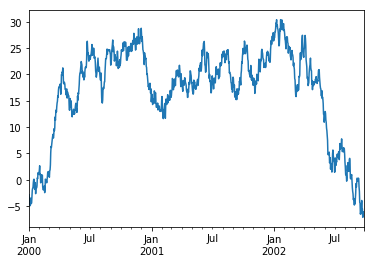

In [60]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
%matplotlib inline
ts.plot()

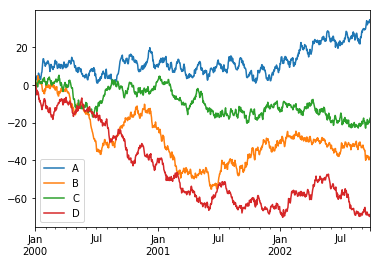

In [68]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()#累积和 help(df.cumsum)
plt.figure();
df.plot();
plt.legend(loc='best')

## Getting Data In/Out
### CSV

In [72]:
df.to_csv('foo.csv')

In [77]:
df=pd.read_csv('foo.csv')

### HDF5

In [78]:
df.to_hdf('foo.h5','df')
df=pd.read_hdf('foo.h5','df')

### Excel

In [81]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
df=pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

## Gotchas

In [84]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().